# INTRODUCTION:


 - The goal of this miniproject is to recommend the best online store in terms of price for users after comparing the price across the stores for various FMCG products. 
 - The data about the products is obtained via Web scrapping. 
    
>GROUP NAME: __Data Wranglers__ <br>
>GROUP MEMBERS: __Taher, Dheeraj, Pavan__

# OVERALL APPROACH: 

The four tasks that will be done as a part of this exercise will be as follows:
 
    1. Data Acquisition  
    2. Data Cleaning 
    3. Data Integration 
    4. Exploratory Data Analysis and Recommendation
  

# 1. Data Aquisition using Web scrapping


## Approach:

 1.  Identify set of categories and products that we want to scrap from various online e-commerce platforms.
 2.  Choose e-commerce platforms 
     >Following platforms have been chosen for scrapping
     - Big Basket
     - DMart
     - Grofers
 3.  Search the products on the browser 
 4.  Identify various CSS classes for product attributes like Product name, MRP, Special Price
 5.  Write code to perform web scrapping for each of the platforms and store the results in a separate CSV file for later use
     > The results are stored in respective csv files as follows
     - Grofers.csv
     - DMart.csv
     - BigBasket.csv

### (i) Scrapping Grofers
 - Webscrapping code for Grofers to read the products details including Product_Name,Rating,Unit,MRP,Actual_Price,Offer,SBC_Offer
 - requests library has been used for scrapping through all products under FMCG

In [56]:
#import necessary libraries
import requests
import json
import io
import csv

#Get Json Value
headers = {
    #'authority': 'grofers.com',
    'app_client': 'consumer_web',
    #'device_id': '7498b4f8-7375-4b57-aaf7-0f3eaa93ebd6',
    'content-type': 'application/json',
    #'access_token': 'null',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
    #'auth_key': '8417c082c135e9f42069c0b2d1e8d3fa5c064f79506499f34040d429a0ca90e0',
    'accept': '*/*',
    #'sec-fetch-site': 'same-origin',
    #'sec-fetch-mode': 'cors',
    #'sec-fetch-dest': 'empty',
    #'referer': 'https://grofers.com/cn/grocery-staples/cid/16',
    #'accept-language': 'en-US,en;q=0.9',
   # 'cookie': '__cfduid=d31eaf291d44b1310043292fcd00c32bf1590848815; gr_1_deviceId=7498b4f8-7375-4b57-aaf7-0f3eaa93ebd6; city=; rl_anonymous_id=%2231fbf717-18c9-4a15-afdf-67a614818225%22; rl_user_id=%22%22; ajs_anonymous_id=%22b0b6b6ad-ffda-452e-a523-0c30688651f2%22; _gcl_au=1.1.654397368.1590848819; _ga=GA1.2.854720604.1590848820; _gid=GA1.2.278603975.1590848820; WZRK_G=3ea34e296b594ab5ad5d4642ff1b0273; _hjid=fe0b5d41-95fc-4bf2-bde2-576b49b32187; __cfruid=2ef2f91cd369f1de0289d881ba407125ca957c14-1590906935; _uetsid=324c872a-7da9-a066-d069-1d6d4c9e3dfd; __insp_wid=180455199; __insp_slim=1590906941705; __insp_nv=true; __insp_targlpu=aHR0cHM6Ly9ncm9mZXJzLmNvbS8%3D; __insp_targlpt=T25saW5lIEdyb2NlcnkgU3RvcmU6IEJ1eSBPbmxpbmUgR3JvY2VyeSBmcm9tIEluZGlhJ3MgQmVzdCBPbmxpbmUgU3VwZXJtYXJrZXQgYXQgRGlzY291bnRlZCBSYXRlcyB8IEdyb2ZlcnM%3D; __insp_norec_sess=true; gr_1_locality=955; gr_1_lat=12.9203821149776; gr_1_lon=80.193180685934; _sp_ses.bf41=*; _sp_id.bf41=c89c0f8ab09667e9.1590848821.5.1590918941.1590906984.70673199-f476-4614-879e-52fce24b049a; WZRK_S_RKR-99Z-ZK5Z=%7B%22s%22%3A1590918925%2C%22t%22%3A1590918983%7D',
}

params = (
    ('l0_cat', '16'),
    ('start', '192'),
    ('next', '48'),
)

response = requests.get('https://grofers.com/v4/search/merchants/28795/products/', headers=headers, params=params).text
#Load Json Values
data=json.loads(response)

#print(data)

totalItemCount=data["meta"]

#print(totalItemCount)
# Get Total Result Count 
totalItemCount=totalItemCount["result_count"]

print(totalItemCount)

# To get all rows 
params_getallrow = (
    ('l0_cat', '16'),
    ('start', '0'),
    ('next', totalItemCount),
)
#Get Json Value
df_fullrow=json.loads(requests.get('https://grofers.com/v4/search/merchants/28795/products/', headers=headers, params=params_getallrow).text)
#Return All products
df_products=df_fullrow["result"]["products"]
#print(len(df_products))
print(df_products)

242
[{'rating': 0, 'rating_flag': False, 'sts_visibility': False, 'type_id': 10359, 'product_tags': [], 'sbc_offer': '20% OFF', 'variant_info': [{'rating': 0, 'rating_flag': False, 'type_id': 10359, 'sbc_offer': '20% OFF', 'has_details': True, 'sts_visibility': False, 'mapping_id': 25349740, 'unit': '1 kg', 'sbc_price': 95, 'b2b_inventory': 100, 'atc_maximizer_score': 13832, 'images': ['https://cdn.grofers.com/app/images/products/full_screen/pro_400096.jpg', 'https://cdn.grofers.com/app/images/products/sliding_image/400096a.jpg?ts=1566466483', 'https://cdn.grofers.com/app/images/products/sliding_image/400096b.jpg?ts=1573475654', 'https://cdn.grofers.com/app/images/products/sliding_image/400096c.jpg?ts=1573475654', 'https://cdn.grofers.com/app/images/products/sliding_image/400096d.jpg?ts=1573475654', 'https://cdn.grofers.com/app/images/products/sliding_image/400096e.jpg'], 'internal_tags': ['out_of_stock'], 'badges': [], 'type_min_discount': 5, 'pid_mapping': {'best_quality': [422953, 4

In [ ]:
#Get Product details & Write CSV file
with open('Grofers_GroceryStaples.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    #Write CSV File header
    writer.writerow(["Product_Name", "Rating", "Unit","MRP","Actual_Price","Offer","SBC_Offer"])
    for i in range(totalItemCount):
        df_row=df_products[i]
        #print(df_row)
        #Get all KG's based on product
        df_variant=df_row["variant_info"]
        for j in range(len(df_variant)):
            Product_Name=df_variant[j]["line_1"]
            Rating=df_variant[j]["rating"]
            Unit=df_variant[j]["unit"]
            MRP=df_variant[j]["mrp"]
            Actual_Price=df_variant[j]["price"]
            Offer=df_variant[j]["offer"]
            SBC_Offer=df_variant[j]["sbc_offer"]
            #Write in CSV File row's
            writer.writerow([Product_Name, Rating, Unit,MRP, Actual_Price,Offer,SBC_Offer])
            print(str(Product_Name) +" "+ str(Rating)+" "+ str(Unit)+" "+ str(MRP)+" "+ str(Actual_Price)+" "+ str(Offer)+" "+str(SBC_Offer)+" \n")

                      

        

### (ii) Scrapping DMart
 - The URL for DMart is same for all pages as long as we include the page number. 
 - So, we need to maintain a URL with placeholder for page in the code
 - DMart requires a Store Id be sent in the header to be sent. Otherwise, it will return wrong results
 - Since, we are very specific about each product, scrapping 2 pages is more than enough

In [2]:
#Dmart Scrapping
def search_dmart(search_brand, search_product):
    #Max pages to scrap
    max_pages = 2
    #Product full name
    searchStr = search_brand + " " + search_product
    #URL for page 
    url_page  = "https://digital.dmart.in/api/v1/search/{0}?page={1}"
    #Necessary request headers
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
    
    #DMart requires store Id 
    headers['storeId']='10657'
    #Replace spaces in the product name with +
    search_str_encoded = searchStr.replace(" ","+")
    
    #Extract product data into a dictionary object
    product_data=[]
    for page in range(1,max_pages):
        url = url_page.format(search_str_encoded, page)
        productsInfo = requests.get(url, headers=headers).json()
        #If the scrapping did not yield any products, just continue with next product
        products=productsInfo.get( 'suggestionView')
        if(not products):
            continue
     
        for product in  products:
            skus = product['skus']
            for sku in skus:  
                if(sku['defining']):
                    name =   sku.get( 'name',  product['name']).strip()
                    product_data.append({"search_brand": search_brand, "search_product": search_product, "shop": "DMart",   "product_name": name,"weight": sku['defining'][0]['volume'], "mrp": sku['price_MRP'], "special_price": sku['price_SALE'] })
    #Return the scrapped data           
    return product_data
 

In [3]:
# Scrapping for all sites
def perform_scrapping():
    #Read all items for which scrapping is needed
    df_input   = pd.read_csv("items1.csv" )
    #Define an empty dataframe to store results for each of the shops
    column_names =   ["search_brand","search_product", "shop",   "product_name", "weight", "mrp", "special_price"]
    
    
    df_dmart = pd.DataFrame(columns = column_names)
    
    
    #For each of the products, peform scrapping
    for ( idx , search_brand, search_product) in df_input.itertuples():
  
        print('Scrapping BigBasket for ', idx, search_brand, search_product)
        product_data = search_bigbasket(search_brand, search_product)
        df_bigbasket = df_bigbasket.append(product_data[:5])

        print('Scrapping Grofers for ', idx, search_brand, search_product)
        product_data = search_grofers(search_brand, search_product)
        df_grofers = df_grofers.append(product_data[:5])

        print('Scrapping BigBasket for ', idx, search_brand, search_product)
        product_data = search_dmart(search_brand, search_product)
        df_dmart = df_dmart.append(product_data[:5])
  
    #Store final results for each of the stores in separate csv file
    df_dmart.to_csv('dmart1.csv', index=False, encoding='utf-8')
 

### (iii) Scrapping BigBasket
- Webscrapping code for Grofers to read the products details including product,category,brand,mrp,sp,discount,sku,description,url
- selenium library has been used for scrapping through all products under FMCG

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#! pip install selenium
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from http.cookiejar import CookieJar
import urllib
import urllib.request
import html.parser
import requests
from requests.exceptions import HTTPError
from socket import error as SocketError
from selenium import webdriver
from xml.dom.minidom import parseString
import json        
import xmlrpc.client

base_url="https://www.bigbasket.com/product/get-products"
cat_path="/?slug=fruits-vegetables"
page="&page="
qry_prm="&tab_type=[%22all%22]&sorted_on=popularity&listtype=pc"

page_vals = ["1","2","3","4","5","6","7","8","9"]

tlcs  = [] #tlc_s
llcn  = [] #llc_n
brand = [] #p_brand
mrp   = [] #mrp
sp    = [] #sp
disc  = [] #dis_val
sku   = [] #sku
desc  = [] #p_desc
purl  = [] #absolute_url

def append (myjson, index, key):
    if key == "tlc_s": 
        tlcs.append(myjson[index])
    elif key == "llc_n":    
        llcn.append(myjson[index])
    elif key == "p_brand":    
        brand.append(myjson[index])
    elif key == "mrp":    
        mrp.append(myjson[index])
    elif key == "sp":    
        sp.append(myjson[index])
    elif key == "dis_val":    
        disc.append(myjson[index])
    elif key == "sku":    
        sku.append(myjson[index])
    elif key == "p_desc":    
        desc.append(myjson[index])
    elif key == "absolute_url":    
        purl.append(myjson[index])

def get_all(myjson, key):
    if type(myjson) == str:
        myjson = json.loads(myjson)
    if type(myjson) is dict:
        for jsonkey in myjson:
            if jsonkey == key:
                append (myjson, jsonkey, key)
            elif type(myjson[jsonkey]) in (list, dict):
                get_all(myjson[jsonkey], key)
    elif type(myjson) is list:
        for item in myjson:
            if item == key:
                append (myjson, item, key)
            elif type(item) in (list, dict):
                get_all(item, key)

#Traversing through page index                
for page_index in page_vals: 
    req_url = base_url+cat_path+page+page_index+qry_prm
    print (req_url)
    try:
        req=urllib.request.Request(req_url)
        cj = CookieJar()
        opener = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
        req.add_header('User-Agent','Mozilla/5.0')
        response = opener.open(req)
        p_json = response.read().decode('utf8', errors='ignore')
        json_object = get_all (p_json, "tlc_s")
        json_object = get_all (p_json, "llc_n")
        json_object = get_all (p_json, "p_brand")
        json_object = get_all (p_json, "mrp")
        json_object = get_all (p_json, "sp")
        json_object = get_all (p_json, "dis_val")
        json_object = get_all (p_json, "sku")
        json_object = get_all (p_json, "p_desc")
        json_object = get_all (p_json, "absolute_url")
        response.close()
    except urllib.request.HTTPError as inst:
        output = format(inst)
        print(output)
    
print ("tlcs", len(tlcs))
print ("llcn", len(llcn))
print ("brand", len(brand))
print ("mrp", len(mrp))
print ("sp", len(sp))
print ("disc", len(disc))
print ("sku", len(sku))
print ("desc", len(desc))
print ("purl", len(purl))


df = pd.DataFrame()
df["product"] = pd.Series(tlcs)
df["category"] = pd.Series(llcn)
df["brand"] = pd.Series(brand)
df["mrp"] = pd.Series(mrp)
df["sp"] = pd.Series(sp)
df["discount"] = pd.Series(disc)
df["sku"] = pd.Series(sku)
df["description"] = pd.Series(desc)
df["url"] = pd.Series(purl)

df.drop (df[df['product'] != 'fruits-vegetables'].index, inplace=True)
df.info()
df.to_csv('BigBasket1.csv')

https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page=1&tab_type=[%22all%22]&sorted_on=popularity&listtype=pc
https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page=2&tab_type=[%22all%22]&sorted_on=popularity&listtype=pc
https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page=3&tab_type=[%22all%22]&sorted_on=popularity&listtype=pc
https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page=4&tab_type=[%22all%22]&sorted_on=popularity&listtype=pc
https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page=5&tab_type=[%22all%22]&sorted_on=popularity&listtype=pc
https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page=6&tab_type=[%22all%22]&sorted_on=popularity&listtype=pc
https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page=7&tab_type=[%22all%22]&sorted_on=popularity&listtype=pc
https://www.bigbasket.com/product/get-products/?slug=fruits-vegetables&page=

Please refer the attached datasets incase the above data set gives any error while retreiving the data.

# 2. Data cleaning and integration

In [6]:
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML

# read in our data
data = pd.read_csv('Grofers.csv') # Reading CSV Input file and storing as pandas dataframe object
data1 = pd.read_csv('DMart.csv') # Reading CSV Input file and storing as pandas dataframe object
data2 = pd.read_csv('BigBasket.csv') # Reading CSV Input file and storing as pandas dataframe object

In [7]:
#Storing each dataset into new variable to keep the original one intact
Grofers = data
DMart = data1
BigBasket = data2

In [8]:
#Shape of the dataset
print (Grofers.shape)
print (DMart.shape)
print (BigBasket.shape)

(291, 7)
(687, 7)
(208, 10)


### (i) Grofers data cleaning 

In [9]:
#Creating a new column for 'Store' name
Grofers['Store'] = 'Grofers' 

In [10]:
#Split "Unit" into 2 columns: Unit and Weight
Grofers[['Weight','Unit']] = Grofers["Unit"].str.split(n=1, expand=True)

In [11]:
#Reordering the coulmns
order = Grofers['Weight']
Grofers.drop(labels=['Weight'], axis=1,inplace = True)
Grofers.insert(2, 'Weight', order)


order = Grofers['Store']
Grofers.drop(labels=['Store'], axis=1,inplace = True)
Grofers.insert(0, 'Store', order)

In [12]:
#Converting unit of measurement
df_kg = Grofers.loc[Grofers['Unit'] == 'kg'] #Filter products with weight as kg
df_l = Grofers.loc[Grofers['Unit'] == 'l'] #Filter products with weight as litre
df_ml = Grofers.loc[Grofers['Unit'] == 'ml'] #Filter products with weight as ml
df_g = Grofers.loc[Grofers['Unit'] == 'g'] #Filter products with weight as grams
df_g=df_g.replace('2x100','200',regex=True) #fixed 1 bad entry in the column "Weight"
df_g["Weight"]= df_g["Weight"].apply(int) #converting the datatype to int
df_g["Weight"]= df_g["Weight"]/1000 #converting the unit to kg
df_g["Unit"]=df_g["Unit"].replace('g','kg',regex=True) #renaming the label to kg
df_ml["Weight"]= df_ml["Weight"].apply(int) #converting the datatype to int
df_ml["Weight"]= df_ml["Weight"]/1000 #converting the unit to l
df_ml["Weight"]= df_ml["Weight"].replace('ml','l',regex=True) #renaming the label to ml
concat=pd.concat([df_g,df_kg,df_l,df_ml]) #concat all units back to dataset
Grofers = concat 

In [13]:
#Renaming the column names as well as dropping few
Grofers.rename(columns = {'MRP':'Price', 'Actual_Price':'Final_Price'}, inplace = True) 
Grofers.drop(['Rating','Offer','SBC_Offer'], axis=1, inplace = True)

### (ii) BigBasket data cleaning 

In [14]:
#remove unnecessary columns from dataset

BigBasket.drop(['Unnamed: 0','sku'], axis =1, inplace = True)
BigBasket.rename(columns = {'category':'sub_category', 'description':'product_name','product':'category'}, inplace = True)
BigBasket=BigBasket[~BigBasket.url.str.contains("combo", na=False)]

In [15]:
def getQuantity(x):
   array = x.split('/')
   qttemp=array[3].split('-')
   size=len(qttemp)
   wt=qttemp[size-1]
   qt=qttemp[size-2]
   if(wt=='kg' or wt=='gm' or wt=='g' or wt=='pcs' or wt=='pc'):
           if(wt=='g'):
               return qt+'-'+'gm'
           elif(wt=='pcs'):
               return qt+'-'+'pc'
           else:
               return qt+'-'+wt
   elif(wt=='bunch'):
       return qttemp[size-3]+qttemp[size-2]
   
BigBasket['Quantity'] = BigBasket['url'].apply(lambda x: getQuantity(x))

In [16]:
BigBasket[['qty','units']] = BigBasket['Quantity'].str.split('-',expand = True)
BigBasket.drop(['url','discount','category','sub_category','brand','Quantity'], axis = 1, inplace = True)
BigBasket.insert(loc=0, column='store', value='BigBasket')
BigBasket.rename(columns = {'mrp':'Price','sp':'Final_Price','qty':'Weight','units':'Unit'}, inplace = True)
BigBasket.rename(columns = {'store':'Store','product_name':'Product_Name'}, inplace = True)

In [17]:
#Reordering the coulmns
order = BigBasket['Price']
BigBasket.drop(labels=['Price'], axis=1,inplace = True)
BigBasket.insert(5, 'Price', order)


order = BigBasket['Final_Price']
BigBasket.drop(labels=['Final_Price'], axis=1,inplace = True)
BigBasket.insert(5, 'Final_Price', order)

In [18]:
# createing new datset df to convert to g or gm to kg
df_kg = BigBasket.loc[BigBasket['Unit'] == 'kg'] #Filter products with weight as kg
df_pc = BigBasket.loc[BigBasket['Unit'] == 'pc'] #Filter products with weight as litre
df_none = BigBasket.loc[BigBasket['Unit'] == 'none'] #Filter products with weight as ml
df_g = BigBasket.loc[BigBasket['Unit'] == 'gm'] #Filter products with weight as grams
df_g=df_g.replace('3x100','200',regex=True) #fixed 1 bad entry in the column "Weight"
df_g["Weight"]= df_g["Weight"].apply(int) #converting the datatype to int
df_g["Weight"]= df_g["Weight"]/1000 #converting the unit to kg
df_g["Unit"]=df_g["Unit"].replace('gm','kg',regex=True) #renaming the label to kg
concat=pd.concat([df_g,df_kg,df_pc,df_none]) #concat all units back to dataset
BigBasket = concat

In [19]:
BigBasket.shape

(201, 6)

### (iii) DMart data cleaning 

In [20]:
DMart.rename(columns = {'shop':'Store','product_name':'Product_Name','weight':'Weight','mrp':'Price','special_price':'Final_Price'}, inplace = True)
DMart.drop(['search_brand','search_product'], axis =1, inplace = True)

#Split "Unit" into 2 columns: Unit and Weight
DMart[['Weight','Unit']] = DMart["Weight"].str.split(n=1, expand=True)

#Reordering the coulmns
order = DMart['Unit']
DMart.drop(labels=['Unit'], axis=1,inplace = True)
DMart.insert(3, 'Unit', order)

In [21]:
df = DMart[DMart.Weight.str.contains('x',case=False)] #Creating temp dataset df
df[['Weight_1','Weight_2']]=df['Weight'].str.split('x', expand=True,n=2) #Split into 2 columns
indexNames = df[ df['Weight'] == '3X150'].index 
df.drop(indexNames , inplace=True)
indexNames = df[ df['Weight'] == '4X125'].index
df.drop(indexNames , inplace=True)
df["Weight_1"] = df["Weight_1"].apply(int) #changing the datatype to int
df["Weight_2"] = df["Weight_2"].apply(int) #changing the datatype to int
df["Weight"] = df["Weight_1"] * df["Weight_2"]
df.drop(['Weight_1','Weight_2'], axis =1, inplace = True)
concat=pd.concat([DMart,df])
DMart=concat
indexNames = DMart[ DMart['Weight'] == '3X150'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '4X125'].index
DMart.drop(indexNames , inplace=True)


# Get names of indexes for which column Age has value 30
indexNames = DMart[ DMart['Weight'] == '3x150'].index
DMart.drop(indexNames , inplace=True) # Delete these row indexes from dataFrame
indexNames = DMart[ DMart['Weight'] == '4x150'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '4x100'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '2x150'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '2x200'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '4x125'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '3x75'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '6x100'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '3x100'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '3x125'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '6x125'].index
DMart.drop(indexNames , inplace=True)
indexNames = DMart[ DMart['Weight'] == '4x75'].index
DMart.drop(indexNames , inplace=True)

In [22]:
# createing new datset df to convert different measurements
df_kg = DMart.loc[DMart['Unit'] == 'kg'] #Filter products with weight as kg, tablets, Litres, ml, mg
df_Tablets = DMart.loc[DMart['Unit'] == 'Tablets']
df_U = DMart.loc[DMart['Unit'] == 'U']
df_L = DMart.loc[DMart['Unit'] == 'L']
df_L["Unit"]=df_L["Unit"].replace('L','l',regex=True)

df_g = DMart.loc[DMart['Unit'] == 'gm'] #Filter products with weight as grams
df_g["Weight"]= df_g["Weight"].apply(float) #converting the datatype to float
df_g["Weight"]= df_g["Weight"]/1000 #converting the unit to kg
df_g["Unit"]=df_g["Unit"].replace('gm','kg',regex=True) #renaming the label to kg

df_ml = DMart.loc[DMart['Unit'] == 'ml'] #Filter products with weight as ml
df_ml["Weight"]= df_ml["Weight"].apply(float) #converting the datatype to float
df_ml["Weight"]= df_ml["Weight"]/1000 #converting the unit to ml
df_ml["Unit"]=df_ml["Unit"].replace('ml','l',regex=True) #renaming the label to l


concat=pd.concat([df_g,df_kg,df_L,df_ml,df_Tablets,df_U]) #concat all units back to dataset
DMart = concat

In [23]:
BigBasket.shape

(201, 6)

In [24]:
concat=pd.concat([Grofers,BigBasket,DMart]) #concat all datsets to one

In [25]:
#Cleaning few left out units and converting it to the right measurement
concat['Weight'] = concat['Weight'].apply(lambda x: '3' if x == '3x1' else x)
concat['Weight'] = concat['Weight'].apply(lambda x: '6' if x == '3x2' else x)
concat['Weight'] = concat['Weight'].apply(lambda x: '15' if x == '5x3' else x)
concat['Weight'] = concat['Weight'].apply(lambda x: '8' if x == '2x4' else x)
concat['Weight'] = concat['Weight'].apply(lambda x: '18' if x == '3x6' else x)
concat['Weight'] = concat['Weight'].apply(lambda x: '30' if x == '5x6' else x)
concat['Weight'] = concat['Weight'].apply(lambda x: '20' if x == '5x4' else x)
concat['Weight'] = concat['Weight'].astype('float') #Changing datatype to float


# 3. Exploratory data analysis and recommendation

### (i) Column names

In [26]:
concat.columns

Index(['Store', 'Product_Name', 'Weight', 'Unit', 'Price', 'Final_Price'], dtype='object')

### (ii) Shape of the dataset

In [27]:
concat.shape

(1108, 6)

### (iii) Describe the dataset

In [28]:
concat.describe()

,Weight,Price,Final_Price
count,1108.000000,1108.000000,1108.000000
mean,1.618231,169.102888,139.869134
std,5.691604,172.966788,151.912750
min,0.020000,8.750000,7.000000
25%,0.200000,69.000000,52.000000
50%,0.500000,105.000000,88.000000
75%,1.000000,200.000000,161.000000
max,120.000000,1660.000000,1660.000000


### (iv) Datatype of the dataset

In [29]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 1 to 676
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         1108 non-null   object 
 1   Product_Name  1108 non-null   object 
 2   Weight        1108 non-null   float64
 3   Unit          1108 non-null   object 
 4   Price         1108 non-null   float64
 5   Final_Price   1108 non-null   float64
dtypes: float64(3), object(3)
memory usage: 60.6+ KB


### (v) Check if any null values in the data sets

In [30]:
concat.isnull().sum()

Store           0
Product_Name    0
Weight          0
Unit            0
Price           0
Final_Price     0
dtype: int64

### (vi) Check if any Duplicate values in the datasets

In [31]:
len(concat[concat.duplicated()])

403

Multiple values dipicts similar products in different dataset

### (vii) Multivariate Analysis

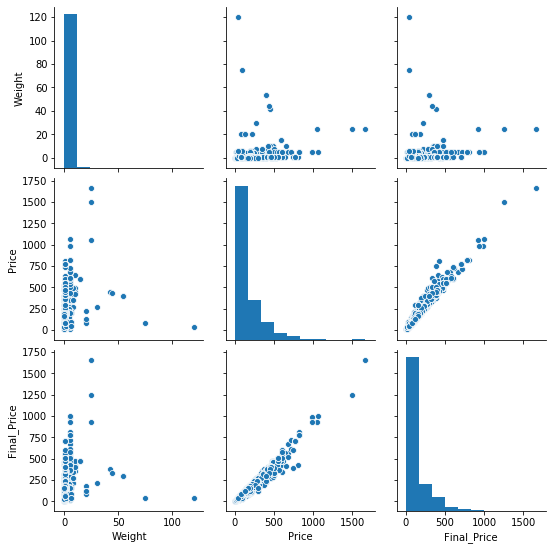

In [32]:
sns.pairplot(concat) #pairplot
plt.show()

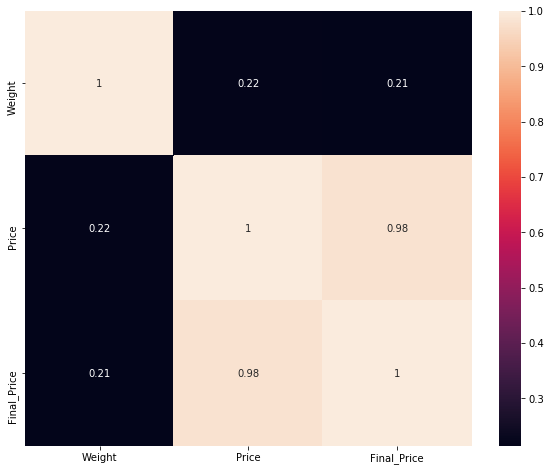

In [33]:
#Heatmap for all attributes
plt.figure(figsize = (10,8))
corr = concat.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [34]:
pd.crosstab(concat.Store, concat.Product_Name, margins=True, margins_name="Total",rownames=['Store']).T

Store,BigBasket,DMart,Grofers,Total
Product_Name,,,,
24 Mantra Organic Arhar Dal/Toor Dal,0,0,1,1
24 Mantra Organic Brown Sonamasuri Rice,0,0,1,1
24 Mantra Organic Coriander Seeds/Dhania,0,0,1,1
24 Mantra Organic Sonamasuri Rice,0,0,1,1
24 Mantra Organic Whole Wheat Atta,0,0,1,1
...,...,...,...,...
YES Premium Raw Ponni Rice,0,0,1,1
YES Rajabhogam Boiled Ponni Rice,0,0,1,1
Yam - Cut,1,0,0,1


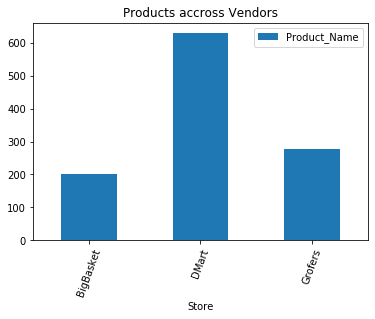

In [35]:
## How many products does each shop have to offer?
prods_shops_df = concat[['Store','Product_Name']]
prod_shops_counts =prods_shops_df.groupby(['Store'],as_index =False).count()
prod_shops_counts.plot.bar(x="Store", y="Product_Name", rot=70, title="Products accross Vendors");

In [36]:
concat.groupby('Store')['Product_Name'].count()

Store
BigBasket    201
DMart        629
Grofers      278
Name: Product_Name, dtype: int64

In [37]:
concat.groupby(['Store','Product_Name']).count()

Weight  Unit  Price  \
Store     Product_Name                                                
BigBasket Aloe Vera - Organically grown              1     1      1   
          Amaranthus - Green                         1     1      1   
          Amaranthus - Red                           1     1      1   
          Amla                                       1     1      1   
          Apple - Fuji Premium                       1     1      1   
...                                                ...   ...    ...   
Grofers   Udhaiyam White Urad Dal (Dhuli)            1     1      1   
          VKR Sivaji Premium Boiled Ponni Rice       1     1      1   
          YES Idli Rice                              1     1      1   
          YES Premium Raw Ponni Rice                 1     1      1   
          YES Rajabhogam Boiled Ponni Rice           1     1      1   

                                                Final_Price  
Store     Product_Name                                       
BigBasket Aloe Vera - Organically grown                   1  
          Amaranthus - Green                              1  
          Amaranthus - Red                                1  
          Amla                                            1  
          Apple - Fuji Premium                            1  
...                                                     ...  
Grofers   Udhaiyam White Urad Dal (Dhuli)                 1  
          VKR Sivaji Premium Boiled Ponni Rice            1  
          YES Idli Rice                                   1  
          YES Premium Raw Ponni Rice                      1  
          YES Rajabhogam Boiled Ponni Rice                1  

[651 rows x 4 columns]

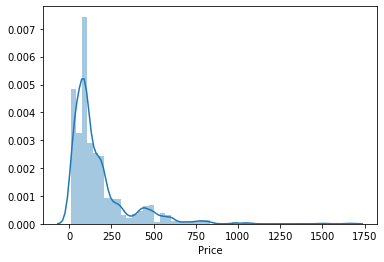

In [38]:
sns.distplot(concat['Price'])

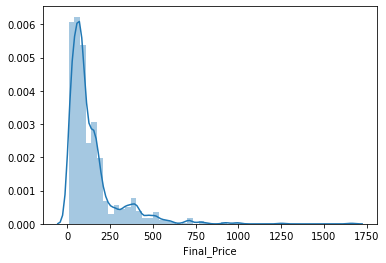

In [39]:
sns.distplot(concat['Final_Price'])

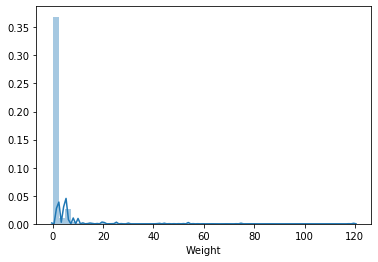

In [40]:
sns.distplot(concat['Weight'])

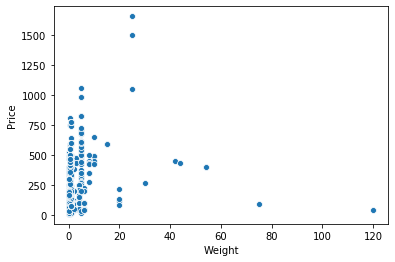

In [41]:
sns.scatterplot(concat['Weight'],concat['Price'])

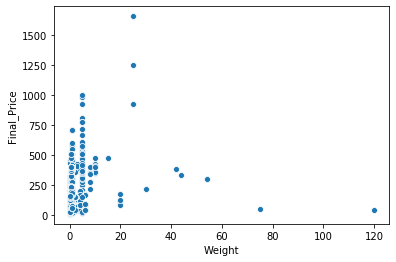

In [42]:
sns.scatterplot(concat['Weight'],concat['Final_Price'])

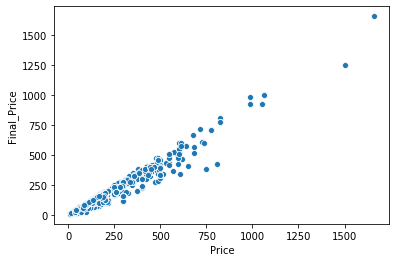

In [43]:
sns.scatterplot(concat['Price'],concat['Final_Price'])

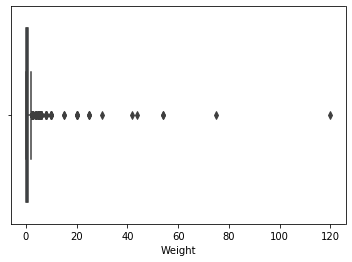

In [44]:
sns.boxplot(concat['Weight'])

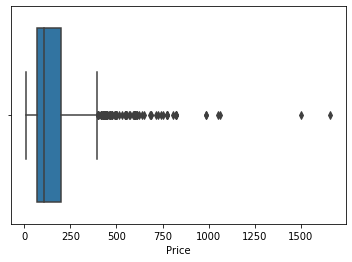

In [45]:
sns.boxplot(concat['Price'])

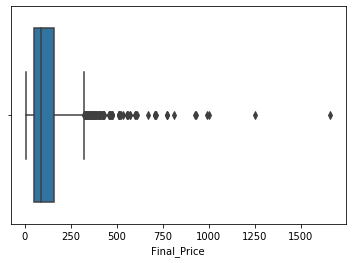

In [46]:
sns.boxplot(concat['Final_Price'])

## (viii) Product recommendation

### Based on customer's input the below query finds a perticular product across all websites with low to high prices of that respective product.

In [47]:
print('Please enter the product name')
prd_name = input('Enter a product : ')
print('Below products are sorted by low to high in price')
concat[concat['Product_Name'].str.contains(prd_name,case=False)].sort_values(by=["Final_Price"])

Please enter the product name
Enter a product : oil
Below products are sorted by low to high in price


,Store,Product_Name,Weight,Unit,Price,Final_Price
205,DMart,Force 10 Power Max Toilet Cleaner : 750 ml,0.75,l,55.0,49.0
247,DMart,Johnson's Baby Hair Oil : 100 ml,0.10,l,80.0,75.0
471,DMart,Johnson's Baby Hair Oil : 100 ml,0.10,l,80.0,75.0
243,DMart,Johnson's Baby Hair Oil : 100 ml,0.10,l,80.0,75.0
364,DMart,Johnson's Baby Hair Oil : 100 ml,0.10,l,80.0,75.0
...,...,...,...,...,...,...
238,Grofers,The Boss Economy Boiled Ponni Rice,25.00,kg,1050.0,926.0
595,DMart,Sundrop Superlite Advanced Sunflower Oil : 5 L...,5.00,l,988.0,928.0
253,Grofers,Sundrop Superlite Advanced Sunflower Oil (Jar),5.00,l,988.0,988.0
593,DMart,Sundrop Heart Oil : 5 Litres,5.00,l,1063.0,999.0


### How many websites sell organic products?

In [48]:
print('Please enter the product name')
prd_name = input('Enter a product : ')
concat[concat['Product_Name'].str.contains(prd_name,case=False)].sort_values(by=["Final_Price"])

Please enter the product name
Enter a product : organic


,Store,Product_Name,Weight,Unit,Price,Final_Price
56,BigBasket,"Chilli - Green, Organically Grown",0.10,kg,10.00,8.0
37,BigBasket,Ginger - Organically Grown,0.10,kg,12.50,10.0
130,BigBasket,Coccinia - Organically Grown,0.25,kg,12.50,10.0
122,BigBasket,Fresh Turmeric - Organically Grown,0.25,kg,15.00,12.0
5,BigBasket,"Tomato - Local, Organically Grown",0.50,kg,15.00,12.0
134,BigBasket,"Capsicum - Green, Organically Grown",0.25,kg,18.75,15.0
163,BigBasket,Banana Stem - Organically Grown,1.00,pc,20.00,16.0
155,BigBasket,Banana Flower - Organically Grown,1.00,pc,21.25,17.0
102,BigBasket,Cucumber - Organically Grown,0.50,kg,21.25,17.0
175,BigBasket,Neem Giloy (Amruta Balli) - Organically Grown,0.10,kg,22.50,18.0


- There are no organics products sold by DMart
- Bigbasket is offering max organics products

### How many websites sell Apple?

In [49]:
print('Please enter the product name')
prd_name = input('Enter a product : ')
concat[concat['Product_Name'].str.contains(prd_name,case=False)].sort_values(by=["Final_Price"])

Please enter the product name
Enter a product : Apple


,Store,Product_Name,Weight,Unit,Price,Final_Price
634,DMart,Rebalanz Tasty Apple Drink : 200 ml,0.2,l,35.00,21.0
622,DMart,Rebalanz Tasty Apple Drink : 200 ml,0.2,l,35.00,21.0
7,DMart,Rebalanz Tasty Apple Drink : 200 ml,0.2,l,35.00,21.0
36,DMart,Rebalanz Tasty Apple Drink : 200 ml,0.2,l,35.00,21.0
88,DMart,Rebalanz Tasty Apple Drink : 200 ml,0.2,l,35.00,21.0
163,DMart,Rebalanz Tasty Apple Drink : 200 ml,0.2,l,35.00,21.0
169,DMart,Rebalanz Tasty Apple Drink : 200 ml,0.2,l,35.00,21.0
336,DMart,Rebalanz Tasty Apple Drink : 200 ml,0.2,l,35.00,21.0
381,DMart,Rebalanz Tasty Apple Drink : 200 ml,0.2,l,35.00,21.0
331,DMart,Rebalanz Tasty Apple Drink : 200 ml,0.2,l,35.00,21.0


- Big Basket and DMart have faily equal number of apple varieties
- There are no apples sold by Grofers

### How many websites sell Olive oil?

In [52]:
print('Please enter the product name')
prd_name = input('Enter a product : ')
concat[concat['Product_Name'].str.contains(prd_name,case=False)].sort_values(by=["Final_Price"])

Please enter the product name
Enter a product : olive


,Store,Product_Name,Weight,Unit,Price,Final_Price
250,Grofers,Figaro Spanish Brand Olive Oil (Tin),0.5,ml,575.0,525.0


- Olive oil is only available in Grofers

### India runs on Chai, let's see where do we get different varieties of tea

In [54]:
print('Please enter the product name')
prd_name = input('Enter a product : ')
concat[concat['Product_Name'].str.contains(prd_name,case=False)].sort_values(by=["Final_Price"])

Please enter the product name
Enter a product : tea


,Store,Product_Name,Weight,Unit,Price,Final_Price
533,DMart,Brookebond Red Label Tea : 100 gms,0.10,kg,35.0,32.0
275,DMart,Brookebond Red Label Tea : 100 gms,0.10,kg,35.0,32.0
529,DMart,Brookebond Red Label Tea : 100 gms,0.10,kg,35.0,32.0
536,DMart,Brooke Bond Red Label Tea : 250 gms,0.25,kg,115.0,105.0
46,DMart,Brooke Bond Red Label Tea : 250 gms,0.25,kg,115.0,105.0
532,DMart,Brooke Bond Red Label Tea : 250 gms,0.25,kg,115.0,105.0
627,DMart,Tata Tea Gold : 250 gms,0.25,kg,130.0,122.0
537,DMart,Brooke Bond Red Label Natural Care Tea : 250 gms,0.25,kg,135.0,125.0
274,DMart,Tata Tea Chakra Gold Premium Tea : 250 gms,0.25,kg,150.0,139.0
631,DMart,Tata Tea Chakra Gold Premium Tea : 250 gms,0.25,kg,150.0,139.0


- Looks like DMart is selling highest varities of tea
- Tea is not available on Big Basket

### End of the project!